In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/headbrain.csv')

In [3]:
df.shape

(237, 4)

In [4]:
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [5]:
X=df['Head Size(cm^3)'].values
y=df['Brain Weight(grams)'].values

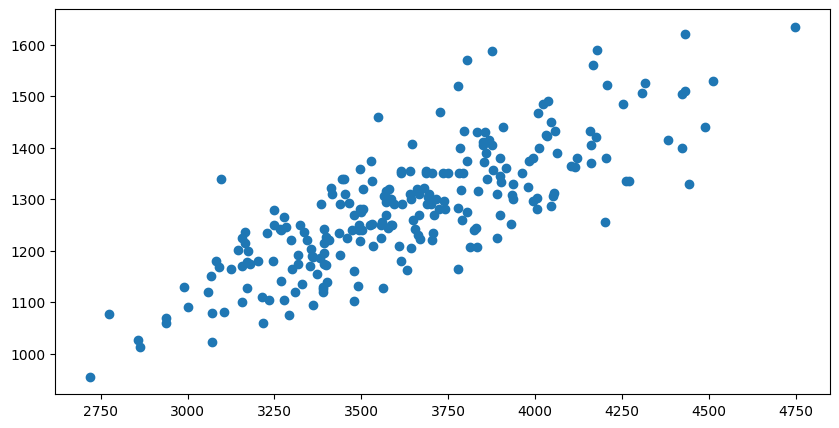

In [6]:
plt.figure(figsize=(10,5))
plt.scatter(X,y)
plt.show()

In [7]:
mean_x=np.mean(X)
mean_y=np.mean(y)
n=len(X)

In [9]:
numer =0
denom=0
for i in range(n):
  numer += (y[i]-mean_y)*(X[i]-mean_x)
  denom += (X[i]-mean_x)**2
slope=numer/denom
intercept=mean_y-(slop*mean_x)
print("Slope: ",slope)
print("Intercept: ",intercept)

Slope:  0.26342933948939945
Intercept:  325.57342104944223


In [12]:
predictions =[]
for i in range(n):
  y_pred=slope*X[i]+intercept
  predictions.append(int(y_pred))

In [13]:
print(predictions[:5])

[1514, 1310, 1448, 1320, 1425]


In [14]:
print(y[:5])

[1530 1297 1335 1282 1590]


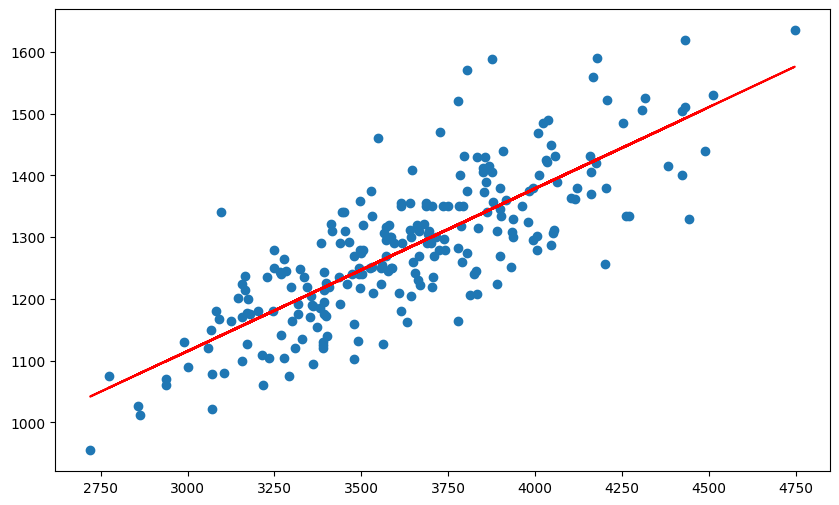

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(X, y)
plt.plot(X, predictions, 'r')
plt.show()

In [18]:
# MSE - Mean Squared Error
error = 0
for i in range(n):
    error += (predictions[i] - y[i]) ** 2

mse = error/n
print("MSE:",mse)
# RMSE
print(np.sqrt(mse))



MSE: 5202.9029535864975
72.13115106239812


GRADIENT DESCENT BASED SLOPE AND INTERCEPT

In [19]:
# Normalization
from sklearn.preprocessing import MinMaxScaler

In [20]:
X.shape

(237,)

In [21]:
# Making our data 2D, so that we can pass in MinMaxScaler
X = np.reshape(X, (-1,1))
y = np.reshape(y, (-1,1))

In [22]:
X.shape

(237, 1)

In [24]:
minmax = MinMaxScaler()
scale_x = minmax.fit_transform(X)
scale_y = minmax.fit_transform(y)
print(scale_x[:5])

[[0.88406512]
 [0.50222003]
 [0.7602368 ]
 [0.52146029]
 [0.71879625]]


In [25]:
def gradientDescent(epochs,alpha):
    slope, inter = 0,0
    for i in range(epochs):
        y_pred = scale_x * slope + inter # y = mx + c
        loss = y_pred - scale_y
        gradSlope = (2/n) * np.dot(loss.T, scale_x)
        gradInter = (2/n) * np.sum(loss)
        slope = slope - gradSlope * alpha
        inter = inter - gradInter * alpha
    return slope, inter

In [26]:
epochs = 7000
alpha = 0.01
slope, inter = gradientDescent(epochs, alpha)
print("New Slope:",slope)
print("New Inter:",inter)

New Slope: [[0.77113429]]
New Inter: 0.13463071358649134


In [27]:
predictions = []
for i in range(n):
    y_pred = slope[0][0] * scale_x[i] + inter
    predictions.append(y_pred)

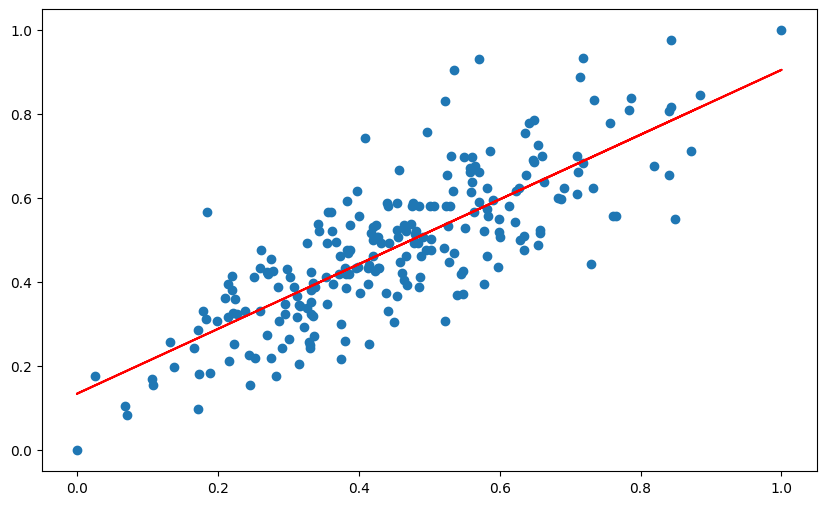

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(scale_x, scale_y)
plt.plot(scale_x, predictions, 'r')
plt.show()